In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes # for type hinting purposes

prefix = os.path.join('..', 'DATASETS')

datasets = {
    'pima_indians': os.path.join(prefix, 'pima-indians-diabetes.data'), 
    'iris_plant': os.path.join(prefix, 'iris_proc.data'),
    'churn_modelling': os.path.join(prefix, 'Churn_Modelling.csv'),
    'social_network': os.path.join(prefix, 'Social_Network_Ads.csv'),
}

for name, file in datasets.items():
    if not os.path.exists(file):
        raise FileNotFoundError(f'Could not find following dataset : [{name}] in {file}')

pima_indians_df = pd.read_csv(
    datasets['pima_indians'],
    names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome'],
)
iris_plant_df = pd.read_csv(datasets['iris_plant'])
churn_modelling_df = pd.read_csv(datasets['churn_modelling'])
social_network_df = pd.read_csv(datasets['social_network'])

print('OK : Datasets loaded')

# print(pima_indians_data, pima_indians_data.shape)
# print(iris_plant_data, iris_plant_data.shape)
# print(churn_modelling_data, churn_modelling_data.shape)
# print(social_network_data, social_network_data.shape)

OK : Datasets loaded


%%html
<style>
td, th {border: 2px solid white}
table {border-collapse: collapse}
</style>

## Pima Indians dataset visualization

668 observations of medical detials.
Age, number of times pregnant, blood workup.
Class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken (1) or not (0).

|original indexes | Pregnancies | Glucose | BloodPressure | SkinThickness | 
|:--|:-|:-|:-|:-|
| new indexes |preg|plac|pres|skin|

|Insulin | BMI | DiabetesPedigreeFunction | Age | Outcome |
|:-|:-|:-|:-|:-|
|test|mass|pedi|age|class|

### Pregnancies
Number of times pregnant


In [63]:
pima_indians_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 0, &#39;age&#39;)

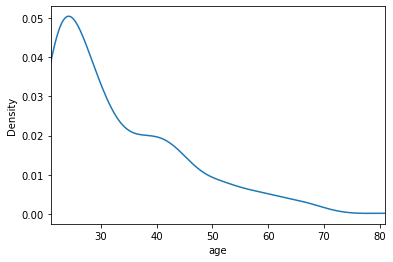

In [64]:
ax = pima_indians_df.age.plot(kind='kde')
ax.set_xlim((pima_indians_df.age.min(), pima_indians_df.age.max()))
ax.set_xlabel('age')
# pima_indians_data.age.hist()

Text(0.5, 0, &#39;age&#39;)

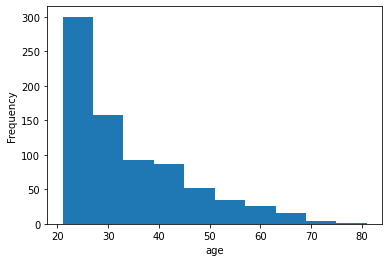

In [65]:
ax: Axes = pima_indians_df.age.plot.hist()
ax.set_xlabel('age')

&lt;matplotlib.axes._subplots.AxesSubplot at 0x216bb377e20&gt;

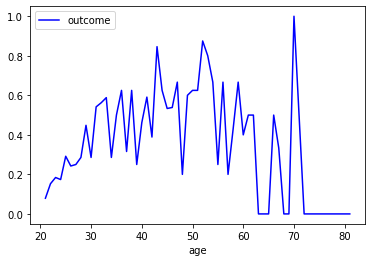

In [110]:
# test_sum = pd.DataFrame(pima_indians_df.groupby('age').outcome.count())
# test_sum.reset_index(level=0, inplace=True)
# test_sum.plot.scatter(
#     x='age',
#     y='outcome',
#     color='blue'
# )

test_sum = pd.DataFrame(pima_indians_df.groupby('age').outcome.mean())
test_sum.reset_index(level=0, inplace=True)
test_sum.plot(
    x='age',
    y='outcome',
    color='blue'
)

# Social Network Ads dataset

In [31]:
social_network_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


&lt;matplotlib.axes._subplots.AxesSubplot at 0x216be2c6e80&gt;

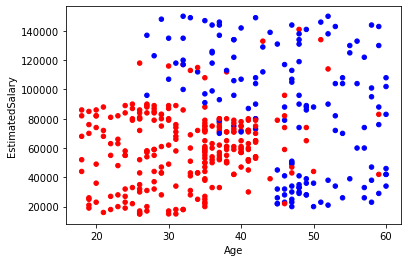

In [37]:
def purchased_to_color(purchased):
    return 'blue' if purchased else 'red'

social_network_df.plot.scatter(
    x='Age',
    y='EstimatedSalary',
    color=social_network_df.Purchased.map(purchased_to_color)
)